In [40]:
#Reproducing time of flight dynamics result from I. Yavin.et.al Am. J. Phys. 70 (2) 2002
#A calculation of the time-of-flight distribution of trapped atoms
#Finite temperature atomic cloud gravitational dynamics Simulator

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
tArr = np.linspace(1e-2,0.4,200)#time slices of a experiment

In [75]:
T= 1.41*10**(-4)#Temperature in Kelvin

In [76]:
kB = 1.38*10**(-23)#Boltzmann constant in m^{2} kg s^{-2} K^{-1} 

In [77]:
m = 1.4*10**(-25)#atomic mass in kg

In [78]:
A = (m/(2*np.pi*kB*T))**(3/2.)

In [95]:
g = 9.81 #gravitational constant

In [96]:
hBar = 6.626*10**(-34)/(2*np.pi) #Planck's constant

In [97]:
sigmaV = np.sqrt((2*kB*T)/m) #spread in velocity distribution

In [98]:
sigma = 0.001 #spread in position distribution

In [141]:
l0 = 300*sigma#distance between probe and plane(for Yavin .et.al paper)

In [142]:
distCube = l0*(sigmaV*tArr*sigmaV*tArr)+0.5*g*tArr*tArr*(2*sigma*sigma+sigmaV*tArr*sigmaV*tArr)

In [143]:
N = A*(sigmaV**3/tArr)*np.pi*(sigma*sigma+sigmaV*sigmaV*tArr*tArr)**(-1.5)*(distCube)*np.exp(-(l0-0.5*g*tArr*tArr)**2/(sigma*sigma+sigmaV*sigmaV*tArr*tArr))

In [144]:
P=N/np.sum(N)

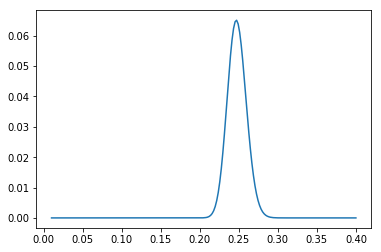

In [145]:
plt.plot(tArr,P) #Plotting Time of Flight Signal

In [146]:
tMesh,xMesh,yMesh = np.meshgrid(tArr,np.linspace(-0.1,0.1,100),np.linspace(-0.1,0.1,100))

In [147]:
distCubeXY = l0*(sigmaV*tMesh*sigmaV*tMesh)+0.5*g*tMesh*tMesh*(2*sigma*sigma+sigmaV*tMesh*sigmaV*tMesh)

In [148]:
Nxy = A*(sigmaV**3/tMesh)*(sigma*sigma+sigmaV*sigmaV*tMesh*tMesh)**(-5/2.)*(distCubeXY)*np.exp(-((l0-0.5*g*tMesh*tMesh)**2+xMesh**2+yMesh**2)/(sigma*sigma+sigmaV*sigmaV*tMesh*tMesh))

In [149]:
Pxy = Nxy/np.sum(Nxy)

6.82718186903071e-08
time in secs 0.01
time in secs 0.1177889447236181
time in secs 0.20597989949748746
time in secs 0.3039698492462312
time in secs 0.4


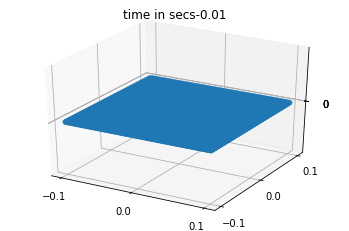

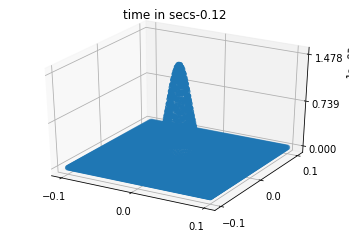

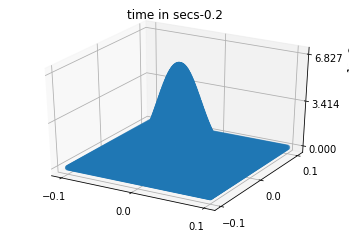

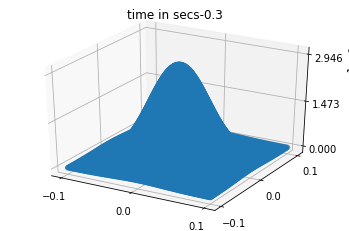

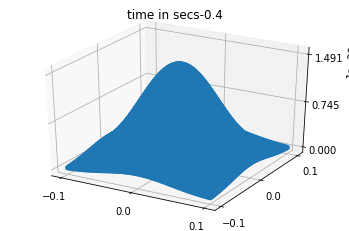

In [150]:
#probability distribution P(x,y,t) versus x,y for times 0.01,0.12,0.2,0.3,0.4 secs
#-------------------------------CODECODECODECODECODE---------------------------
from mpl_toolkits.mplot3d import Axes3D
maxim = np.array([Pxy[:,0,:].max(),Pxy[:,50,:].max(),Pxy[:,100,:].max(),Pxy[:,150,:].max(),Pxy[:,199,:].max()]).max()
print (maxim)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xMesh[:,55,:],yMesh[:,55,:],Pxy[:,0,:],marker='o')
ax.set_title("time in secs-0.01")
ax.xaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax.yaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax.zaxis.set_ticks(np.linspace(0,Pxy[:,0,:].max(),3))
print("time in secs",tArr[0])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(xMesh[:,55,:],yMesh[:,55,:],Pxy[:,50,:],marker='o')
ax1.set_title("time in secs-0.12")
ax1.xaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax1.yaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax1.zaxis.set_ticks(np.linspace(0,Pxy[:,50,:].max(),3))
print("time in secs",tArr[55])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(xMesh[:,55,:],yMesh[:,55,:],Pxy[:,100,:],marker='o')
ax2.set_title("time in secs-0.2")
ax2.xaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax2.yaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax2.zaxis.set_ticks(np.linspace(0,Pxy[:,100,:].max(),3))
print("time in secs",tArr[100])
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(xMesh[:,55,:],yMesh[:,55,:],Pxy[:,150,:],marker='o')
ax3.set_title("time in secs-0.3")
ax3.xaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax3.yaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax3.zaxis.set_ticks(np.linspace(0,Pxy[:,150,:].max(),3))
print("time in secs",tArr[150])
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(xMesh[:,55,:],yMesh[:,55,:],Pxy[:,199,:],marker='o')
ax4.set_title("time in secs-0.4")
ax4.xaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax4.yaxis.set_ticks(np.linspace(-0.1,0.1,3))
ax4.zaxis.set_ticks(np.linspace(0,Pxy[:,199,:].max(),3))
print("time in secs",tArr[199])

In [151]:
#Expansion of the Atomic Cloud
#Radius(t) = \sqrt((\DeltaX)^{2}+(\DeltaY)^{2}+(\DeltaZ)^{2}) radius is the square root sum of the standard deviation
#-------------------------------CODECODECODECODECODE---------------------------
meanX = np.sum(np.sum(xMesh*Pxy,axis=0),axis=1)
meanY = np.sum(np.sum(yMesh*Pxy,axis=0),axis=1)
zMesh = l0+sigmaV*tMesh+0.5*g*tMesh*tMesh
meanZ = np.sum(np.sum(zMesh*Pxy,axis=0),axis=1)
stdevX =  np.cumsum(np.sum(np.sum(xMesh*xMesh*Pxy,axis=0),axis=1)-meanX*meanX)
stdevY =  np.cumsum(np.sum(np.sum(yMesh*yMesh*Pxy,axis=0),axis=1)-meanY*meanY)
stdevZ =  np.cumsum(np.sum(np.sum(zMesh*zMesh*Pxy,axis=0),axis=1)-meanZ*meanZ)

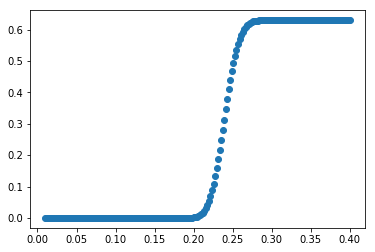

In [152]:
plt.plot(tArr,np.sqrt(stdevX+stdevY+stdevZ),linestyle='',marker='o')

In [455]:
#Gravity Free environment AI interferometry
#Reproducing the contrast and Fidelity simulations from Qing-Qing Hu.et.al(2018) arxiv:1805.05707
#Scheme for suppressing atom expansion induced contrast loss in atom interferometers

In [528]:
#1.Parameter initialization of the interferometer
w = 20*0.001 #Width of Raman Beam -normal value
w1 = 30*0.001 #Width of Raman Beam -better value
E = 0.404 #\frac{/Gamma^{2}}{2I_{s}\delta}\frac{P_{0}}{\pi}
phi1 = 0.0 #raman laser phase at pi/2. instance
omegaMax0 = E/w**2 #Maximum two photon Rabi Frequency-161Hz for width w=20mm
tauArr = np.linspace(0.0,4*np.pi/omegaMax0,21) #Raman Pulse Duration

In [529]:
#2.Parameter initialization of the atomic cloud
T= 7*10**(-6)#7x10^(-6)#Temperature in Kelvin - Normal value
T1= 3*10**(-6)#Temperature in Kelvin - Better Value
kB = 1.38*10**(-23)#Boltzmann constant in m^{2} kg s^{-2} K^{-1} 
m = 1.4*10**(-25) #atomic mass in kg
sigma0 = 0.003 #Size of Atomic cloud at initial time
sigmaV = np.sqrt((2*kB*T)/m)#spread in velocity distribution
sigmaV1 = np.sqrt((2*kB*T1)/m)#spread in velocity distribution
tArr = np.linspace(0.0,1.0,20) #irradiation time
sigma_t = np.sqrt(sigma0*sigma0+sigmaV*sigmaV*tArr*tArr) #growth in size of atomic cloud over time
sigma_t1 = np.sqrt(sigma0*sigma0+sigmaV1*sigmaV1*tArr*tArr) #growth in size of atomic cloud over time
#cylindrical coordinate description of atomic cloud
rArr = np.linspace(0,0.1,10) #radial distance along xy plane from the center of a Raman beam
zArr = np.linspace(-0.1,0.1,20) #z-coordinate

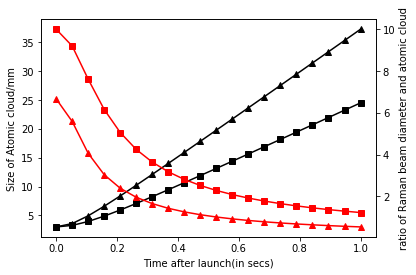

In [530]:
fig, ax1 = plt.subplots()
ax1.plot(tArr,sigma_t/0.001,marker='^',color='k')#Normal situation Temp 7\mu K, Laser width 20 mm
ax1.plot(tArr,sigma_t1/0.001,marker='s',color='k')#Normal situation Temp 3\mu K, Laser width 30 mm
ax2=ax1.twinx()
s = w/sigma_t #Ratio of laser beam width to cloud diameter(Follow section 3.1 of arxiv:1805.05707)
ax2.plot(tArr,w/sigma_t,marker='^',color='r')
ax2.plot(tArr,w1/sigma_t1,marker='s',color='r')
ax1.set_xlabel('Time after launch(in secs)')
ax1.set_ylabel('Size of Atomic cloud/mm')
ax2.set_ylabel('ratio of Raman beam diameter and atomic cloud')
plt.show()

In [531]:
#Constructing Transfer Function for a single pi pulse with pulse duration tau
def M(omegaR,tau,delta,t0,phi): #K. Moler, D.S. Weiss, M. Kasevich, S. Chu, Phys Rev A, {\bf 45} (1992)
    sinAlpha = delta/omegaR
    cosAlpha = np.sqrt(omegaR*omegaR-delta*delta)/omegaR
    #A=\cos(\Omega_{R}\tau/2)-i\sin\alpha\sin(\Omega_{R}\tau/2)
    A = np.cos(omegaR*tau/2.)-1j*sinAlpha*np.sin(omegaR*tau/2.)
    #B=\exp(i(\delta t_{0}+\phi))\cos\alpha\sin(\Omega_{R}\tau/2)
    B = np.exp(1j*(delta*t0+phi))*cosAlpha*np.sin(omegaR*tau/2.)
    return np.array([[A,-1j*B],[-1j*np.conj(B),np.conj(A)]])

In [532]:
#Constructing the probability distribution with normal parameter T=7\mu Kelvin
def n(r,z,t):
    return (1/(2*np.pi)**(3/2.))*(1/sigma_t[tArr==t]**3)*np.exp(-(r*r+z*z)/(2*(sigma_t[tArr==t]**2)))

In [533]:

def norm(t):
    norm=0.0
    for r in rArr:
        for z in zArr:
               norm+=n(r,z,t)
    return norm           

Fidelity for the pi pulse at irradiation time corresponding to s=4.4 0.0022945012916859415
Fidelity for the pi pulse at irradiation time corresponding to s=1.2 0.06971039257258715


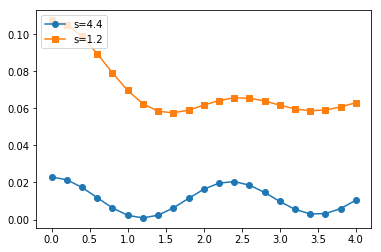

In [534]:
tArr_special = np.array([tArr[4],tArr[13]])  #irradiation time corresponding to s = w/\sigma =4.4,1.2 with normal parameters                       
tauMesh,tMesh = np.meshgrid(tauArr,tArr_special)#Meshgrid created out of raman pulse duration(tau) and irradation moments(tArr)
omegaRarr = omegaMax0*np.exp(-rArr*rArr/(2*w*w))#Effective two photon Rabi Frequency due to Gaussian Profile of Laser Beam
P2 = 0.0*tauMesh.copy() #Transition Probability for a single pi pulse 
count=0.0
for i in range(len(tArr_special)):
    for j in range(len(tauArr)):
        summedOverspaceProbDens=0.0
        for r in rArr:
            for z in zArr:
                summedOverspaceProbDens+=2*np.pi*r*(n(r,z,tArr_special[i])/norm(tArr_special[i]))*np.abs(np.dot(M(omegaRarr[rArr==r],tauArr[j],0,0,phi1)[:,:,0],np.array([1,0]))[0])**2
        count+=1
        P2[i][j] = summedOverspaceProbDens      
F1=P2[0][5] #Fidelity for the pi pulse at irradiation time corresponding to s=4.4(laser beam width/cloud diameter)
F2=P2[1][5] #Fidelity for the pi pulse at irradiation time corresponding to s=1.2 ^^^^^^^^^^^^^^^^^^^
print("Fidelity for the pi pulse at irradiation time corresponding to s=4.4",F1)
print("Fidelity for the pi pulse at irradiation time corresponding to s=1.2",F2)
plt.plot(omegaMax0*tauMesh[0]/np.pi,P2[0],marker='o',label='s=4.4')
plt.plot(omegaMax0*tauMesh[0]/np.pi,P2[1],marker='s',label='s=1.2')
plt.legend(loc='upper left')
plt.show()

In [535]:
#Rabi oscillation curves under different diameter ratios. It shows that the decrease of the diameter
#ratio results in a decrease of the π pulse fidelity and a change of the pi pulse duration.

In [ ]:
#the x axis in the figure is tau/omegaMax0^{-1} in units of pi
#the y axis is the transition probability due to pi pulse